In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Extract numerical features
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

#Ensure the data is in a suitable format (numpy array)
point_cloud = np.array(features)

In [5]:
from ripser import Rips

rips = Rips(maxdim=2)

diagrams = rips.fit_transform(point_cloud)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [7]:
# function to plot persistence diagrams
def plot_persistence_diagrams(diagrams):
    for dim, diagram in enumerate(diagrams):
        if len(diagram) > 0:
            plt.scatter(diagram[:, 0], diagram[:, 1], label=f'Dimension {dim}')
            
            # Calculate max_value for each diagram within the loop
            max_value = max(np.max(diagram[:, 0]), np.max(diagram[:, 1]))
            
            # Add a diagonal line for each diagram
            plt.plot([0, max_value], [0, max_value], color='black', linestyle='--')
    
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('Persistence Diagrams')
    plt.legend()
    plt.show()

# Persistent Diagram for H_0, H_1, and H_2 for all Species

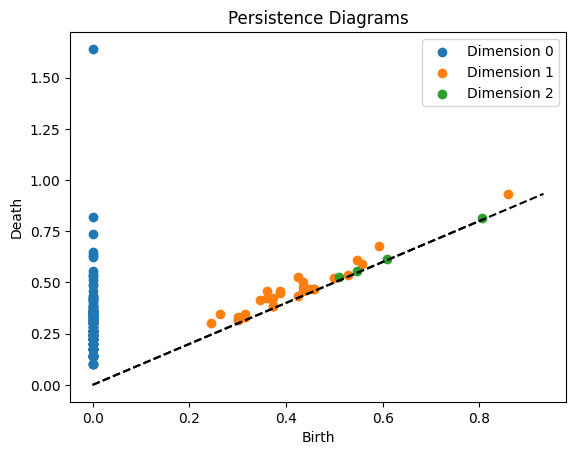

In [9]:
plot_persistence_diagrams(diagrams)

# Persistence Diagrams by Species

Species: Iris-setosa
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


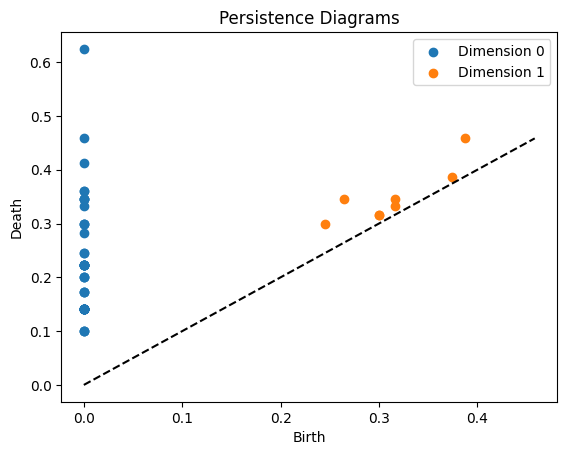

Species: Iris-versicolor
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


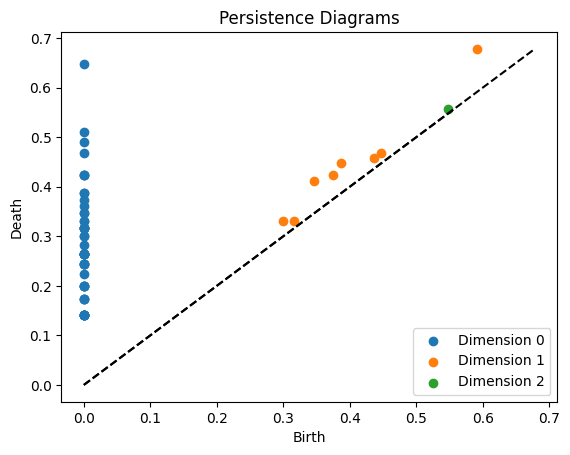

Species: Iris-virginica
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


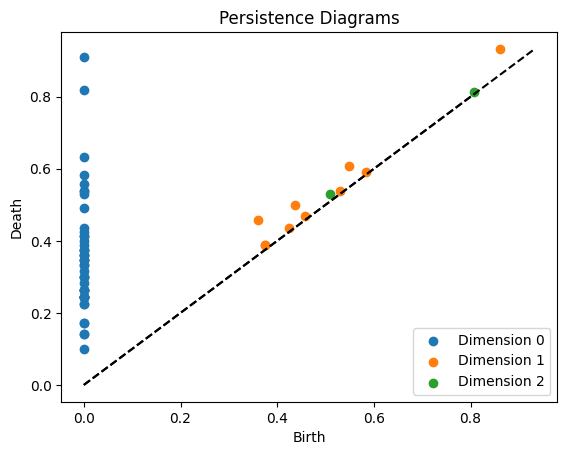

In [22]:
grouped_by_species = data.groupby("Species")

# Perform analysis on each group
for species, group_data in grouped_by_species:
    print("Species:", species)
    #print("Number of samples:", len(group_data))

    #print(group_data)

    features = group_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

    point_cloud = np.array(features)

    rips = Rips(maxdim=2)

    diagrams = rips.fit_transform(point_cloud)

    plot_persistence_diagrams(diagrams)

# Persistence Diagrams by Measurement

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


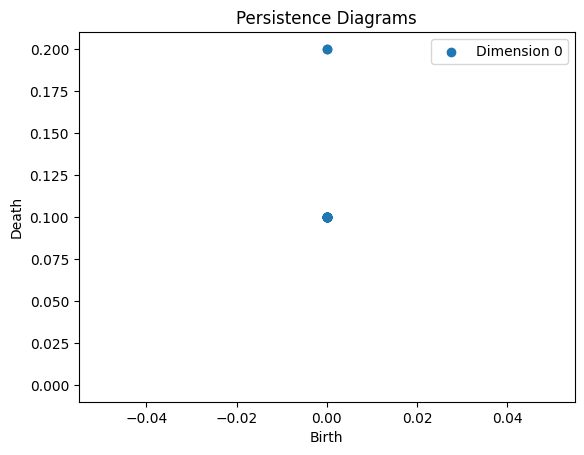

In [41]:
SepalLengths = data['SepalLengthCm'].values

point_cloud_lengths = np.array(SepalLengths)

#print(point_cloud_features.shape)

rips = Rips(maxdim=2)

diagrams_lengths = rips.fit_transform(point_cloud_lengths.reshape(-1,1))

plot_persistence_diagrams(diagrams)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


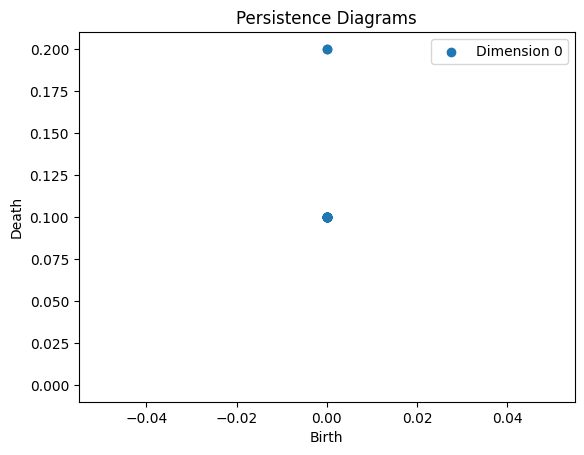

In [42]:
SepalWidths = data['SepalWidthCm'].values

point_cloud_widths = np.array(SepalWidths)

#print(point_cloud_features.shape)

rips = Rips(maxdim=2)

diagrams_widths = rips.fit_transform(point_cloud_widths.reshape(-1,1))

plot_persistence_diagrams(diagrams_widths)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


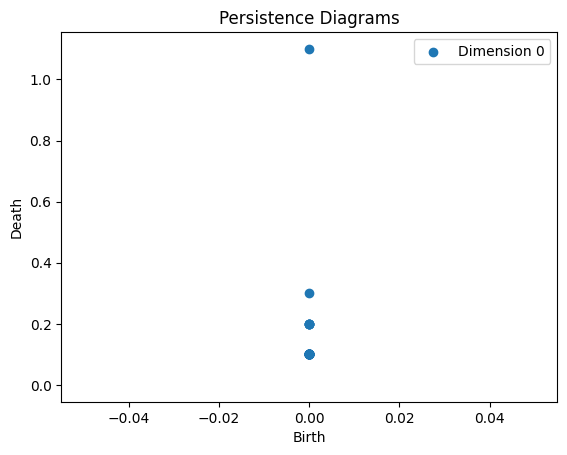

In [43]:
PetalLengths = data['PetalLengthCm'].values

point_cloud_petal_lengths = np.array(PetalLengths)

#print(point_cloud_features.shape)

rips = Rips(maxdim=2)

diagrams_petal_lengths = rips.fit_transform(point_cloud_petal_lengths.reshape(-1,1))

plot_persistence_diagrams(diagrams_petal_lengths)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


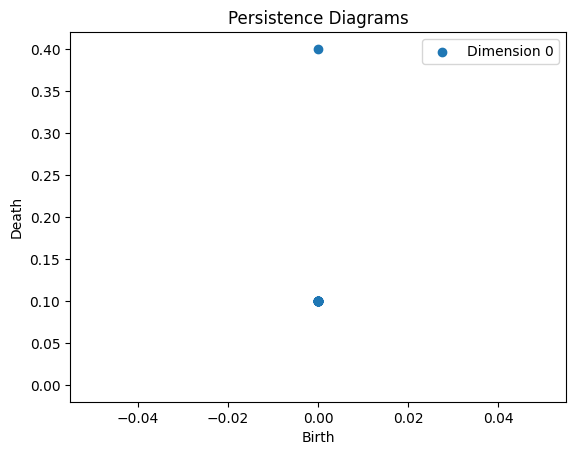

In [44]:
PetalWidths = data['PetalWidthCm'].values

point_cloud_petal_widths = np.array(PetalWidths)

#print(point_cloud_features.shape)

rips = Rips(maxdim=2)

diagrams_petal_widths = rips.fit_transform(point_cloud_petal_widths.reshape(-1,1))

plot_persistence_diagrams(diagrams_petal_widths)

# Mapper by Species

In [47]:
import kmapper as km

In [49]:
grouped_by_species = data.groupby("Species")

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Perform analysis on each group
for species, group_data in grouped_by_species:
    print("Species:", species)
    #print("Number of samples:", len(group_data))

    #print(group_data)

    features = group_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

    point_cloud = np.array(features)

    # Fit to and transform the data
    projected_data = mapper.fit_transform(features, projection=[0,1]) # X-Y axis

    # Create a cover with 10 elements
    cover = km.Cover(n_cubes=10)

    # Create dictionary called 'graph' with nodes, edges, and meta-information
    graph = mapper.map(projected_data, cover=cover)

    # Visualize it
    mapper.visualize(graph, path_html="iris_data_set.html", title="iris_data_set")

KeplerMapper(verbose=1)
Species: Iris-setosa
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (50, 4)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (50, 2) using lens shaped (50, 2)

Creating 100 hypercubes.

Created 66 edges and 28 nodes in 0:00:00.153430.
Wrote visualization to: iris_data_set.html
Species: Iris-versicolor
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (50, 4)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (50, 2) using lens shaped (50, 2)

Creating 100 hypercubes.

Created 59 edges and 25 nodes in 0:00:00.097164.
Wrote visualization to: iris_data_set.html
Species: Iris-virginica
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()

# Mapper by measurement

In [60]:
#Initialize
mapper = km.KeplerMapper(verbose=1)

SepalLengths = data['SepalLengthCm'].values

point_cloud_sepal_lengths = np.array(SepalLengths)

# Fit to and transform data
projected_data_sepal_lengths = mapper.fit_transform(point_cloud_sepal_lengths.reshape(-1,1), projection=[0])

# Create a cover with 10 elements
cover_sepal_lengths = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges, and meta-information
graph_sepal_lengths = mapper.map(projected_data_sepal_lengths, point_cloud_sepal_lengths.reshape(-1,1), cover=cover)

# Visualize it
mapper.visualize(graph_sepal_lengths, path_html="sepal_lengths.html", title="sepal lengths")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (150, 1)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (150, 1) using lens shaped (150, 1)

Creating 10 hypercubes.

Created 9 edges and 10 nodes in 0:00:00.020606.
Wrote visualization to: sepal_lengths.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>sepal lengths | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [61]:
#Initialize
mapper = km.KeplerMapper(verbose=1)

SepalWidths = data['SepalWidthCm'].values

point_cloud_sepal_widths = np.array(SepalWidths)

# Fit to and transform data
projected_data_sepal_widths = mapper.fit_transform(point_cloud_sepal_widths.reshape(-1,1), projection=[0])

# Create a cover with 10 elements
cover_sepal_widths = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges, and meta-information
graph_sepal_widths = mapper.map(projected_data_sepal_widths, point_cloud_sepal_widths.reshape(-1,1), cover=cover)

# Visualize it
mapper.visualize(graph_sepal_widths, path_html="sepal_widths.html", title="sepal widths")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (150, 1)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (150, 1) using lens shaped (150, 1)

Creating 10 hypercubes.

Created 9 edges and 10 nodes in 0:00:00.019004.
Wrote visualization to: sepal_widths.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>sepal widths | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight

In [65]:
#Initialize
mapper = km.KeplerMapper(verbose=1)

PetalLengths = data['PetalLengthCm'].values

point_cloud_petal_lengths = np.array(PetalLengths)

# Fit to and transform data
projected_petal_lengths = mapper.fit_transform(point_cloud_petal_lengths.reshape(-1,1), projection=[0])

# Create a cover with 10 elements
cover_petals_lengths = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges, and meta-information
graph_petal_lengths = mapper.map(projected_petal_lengths, point_cloud_petal_lengths.reshape(-1,1), cover=cover)

# Visualize it
mapper.visualize(graph_petal_lengths, path_html="petal_lengths.html", title="petal lengths")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (150, 1)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (150, 1) using lens shaped (150, 1)

Creating 10 hypercubes.

Created 7 edges and 9 nodes in 0:00:00.028891.
Wrote visualization to: petal_lengths.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>petal lengths | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [59]:
#Initialize
mapper = km.KeplerMapper(verbose=1)

PetalWidths = data['PetalWidthCm'].values

point_cloud_petal_widths = np.array(PetalWidths)

# Fit to and transform data
projected_data_petals_widths = mapper.fit_transform(point_cloud_petal_widths.reshape(-1,1), projection=[0])

# Create a cover with 10 elements
cover_petals_widths = km.Cover(n_cubes=10)

# Create dictionary called 'graph' with nodes, edges, and meta-information
graph_petals_widths = mapper.map(projected_data_petals_widths, point_cloud_petal_widths.reshape(-1,1), cover=cover)

# Visualize it
mapper.visualize(graph_petals_widths, path_html="petal_widths.html", title="petal widths")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (150, 1)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (150, 1) using lens shaped (150, 1)

Creating 10 hypercubes.

Created 7 edges and 9 nodes in 0:00:00.016182.
Wrote visualization to: petal_widths.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>petal widths | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight